# Health Insurance Cost Prediction Project using SageMaker Linear Learner and ANN

# Project Overview
The Health Insurance Cost Prediction project aims to build predictive models to estimate the health insurance cost incurred by individuals based on various factors, including age, gender, BMI, number of children, smoking habit, and geo-location. This data science endeavor leverages cutting-edge tools and technologies, including AWS SageMaker Linear Learner and Artificial Neural Networks (ANN), to perform a comprehensive analysis and facilitate data-driven decision-making in the realm of healthcare expenses.

## Tools and Technologies
To achieve my objectives, I utilize the power of the following tools and technologies:

- SageMaker Linear Learner: A robust machine learning algorithm employed for accurate regression modeling.
- Artificial Neural Networks (ANN): A powerful deep learning technique for developing predictive models.
- Python: The versatile programming language serving as the foundation for data analysis, preprocessing, and model development.
- Jupyter Notebook: A dynamic environment for interactive data exploration, visualization, and model evaluation.

# Phases of the Project

## [1. Data Collection and Organization](#s1)
The project commences with the collection and organization of the health insurance cost dataset into a high-quality DataFrame. Ensuring data integrity and consistency is of paramount importance as it lays the groundwork for all subsequent analyses. By employing meticulous preprocessing and cleaning techniques, I establish a robust foundation for in-depth investigation.

## [2. Exploratory Data Analysis (EDA) and Visualization](#s2)
Leveraging the structured DataFrame, we proceed to conduct extensive exploratory data analysis (EDA) and visualization. Employing a repertoire of statistical and visual techniques, I unearth meaningful patterns, identify correlations, and gain a comprehensive understanding of the dataset's inherent characteristics. This EDA phase serves as a pivotal stepping stone, enabling stakeholders to make well-informed decisions based on a profound comprehension of the dataset's properties.

## [3. Building and Validating Predictive Models](#s3)
My focus then shifts to building predictive models using both SageMaker Linear Learner and Artificial Neural Networks (ANN). By meticulously selecting relevant variables and predictors, I ensure the models capture the essential factors influencing health insurance costs. Extensive validation and verification procedures are implemented to instill confidence in the models' reliability and robustness.

# [4. Conclusion](#s4)
The successful implementation of the Health Insurance Cost Prediction project holds significant potential to revolutionize healthcare resource allocation and decision-making. The combined power of SageMaker Linear Learner and ANN equips us with accurate and sophisticated predictive models, enabling individuals, healthcare providers, and insurance companies to make informed choices regarding healthcare plans, coverage, and budgeting. The predictive capabilities of the models equip stakeholders with invaluable insights, facilitating optimal resource allocation and budget planning.

As I embark on this exciting journey of health insurance cost prediction, I aim to unleash the full potential of data science, demonstrating the transformative impact of advanced machine learning and deep learning techniques in enhancing the understanding of healthcare expenses and enabling data-driven decision-making in the realm of health insurance.

Data Source:https://www.kaggle.com/mirichoi0218/insurance



# Data Collection and Organization <a id='s1'></a>

In [2]:
# import necessary libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read the csv file 
insurance_df = pd.read_csv('insurance.csv')

In [5]:
# first five rows
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# last five rows
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# summary statistics of dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observation:**
- First look at summary statistics tells me there arent any outliers nor missing values which makes life slighlty easier

# Exploratory Data Analysis (EDA) and Visualization <a id='s2'></a>

<AxesSubplot:>

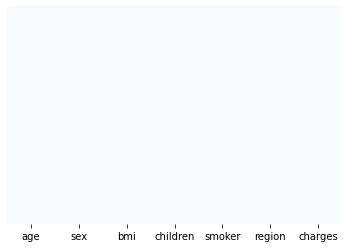

In [13]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


**Observation:**
- Confirmed: no missing values

In [14]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# sheck the dataframe info

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
# grouping by region to see any relationship between region and charges
df_region = insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


**Observation:**
- Seems like south east region has the highest charges and body mass index

In [17]:
# group by age and aggregate mean on columns
df_age=insurance_df.groupby(by="age").mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


<AxesSubplot:xlabel='age', ylabel='charges'>

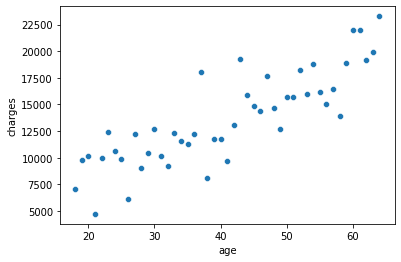

In [18]:
# scatterplot of age and charges
sns.scatterplot(x=df_age.index,y="charges",data=df_age)

**Observation:**
- Can definitely see a line forming which implies linear relationship bw age and charges

In [19]:
# check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [20]:
# convert categorical variable to numerical

insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [21]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [22]:
# check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
# convert categorical variable to numerical 

insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [24]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [25]:
# check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
# performing categorical encoding on region column
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [27]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [28]:
# combining the two dfs 
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [29]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [30]:
# drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)


In [31]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [32]:
# summary statistics of combined df
insurance_df.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

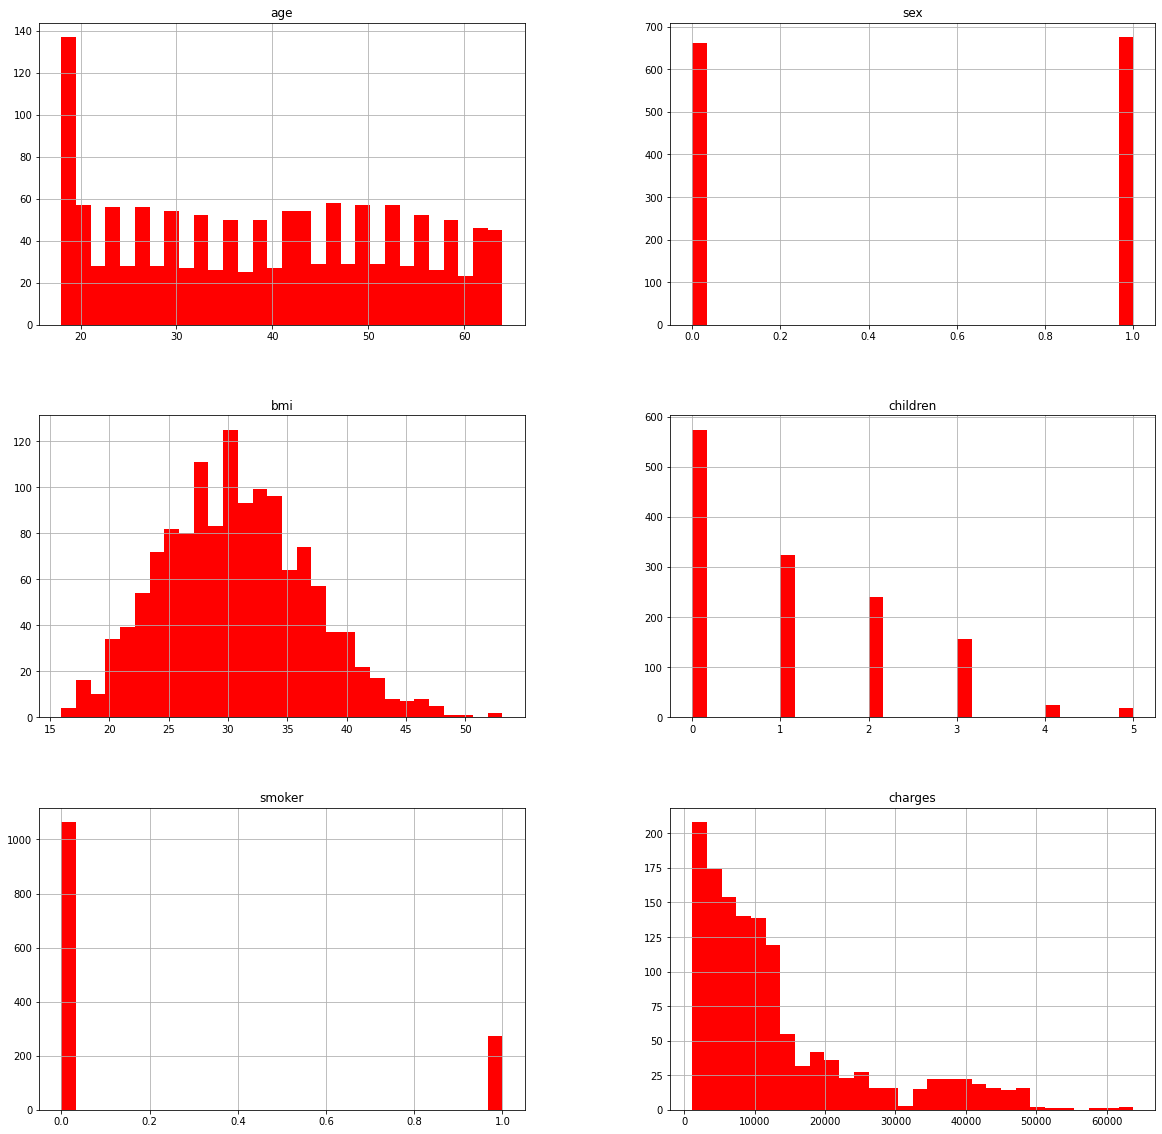

In [33]:
# histogram of selected columns
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (20,20), color = 'r')


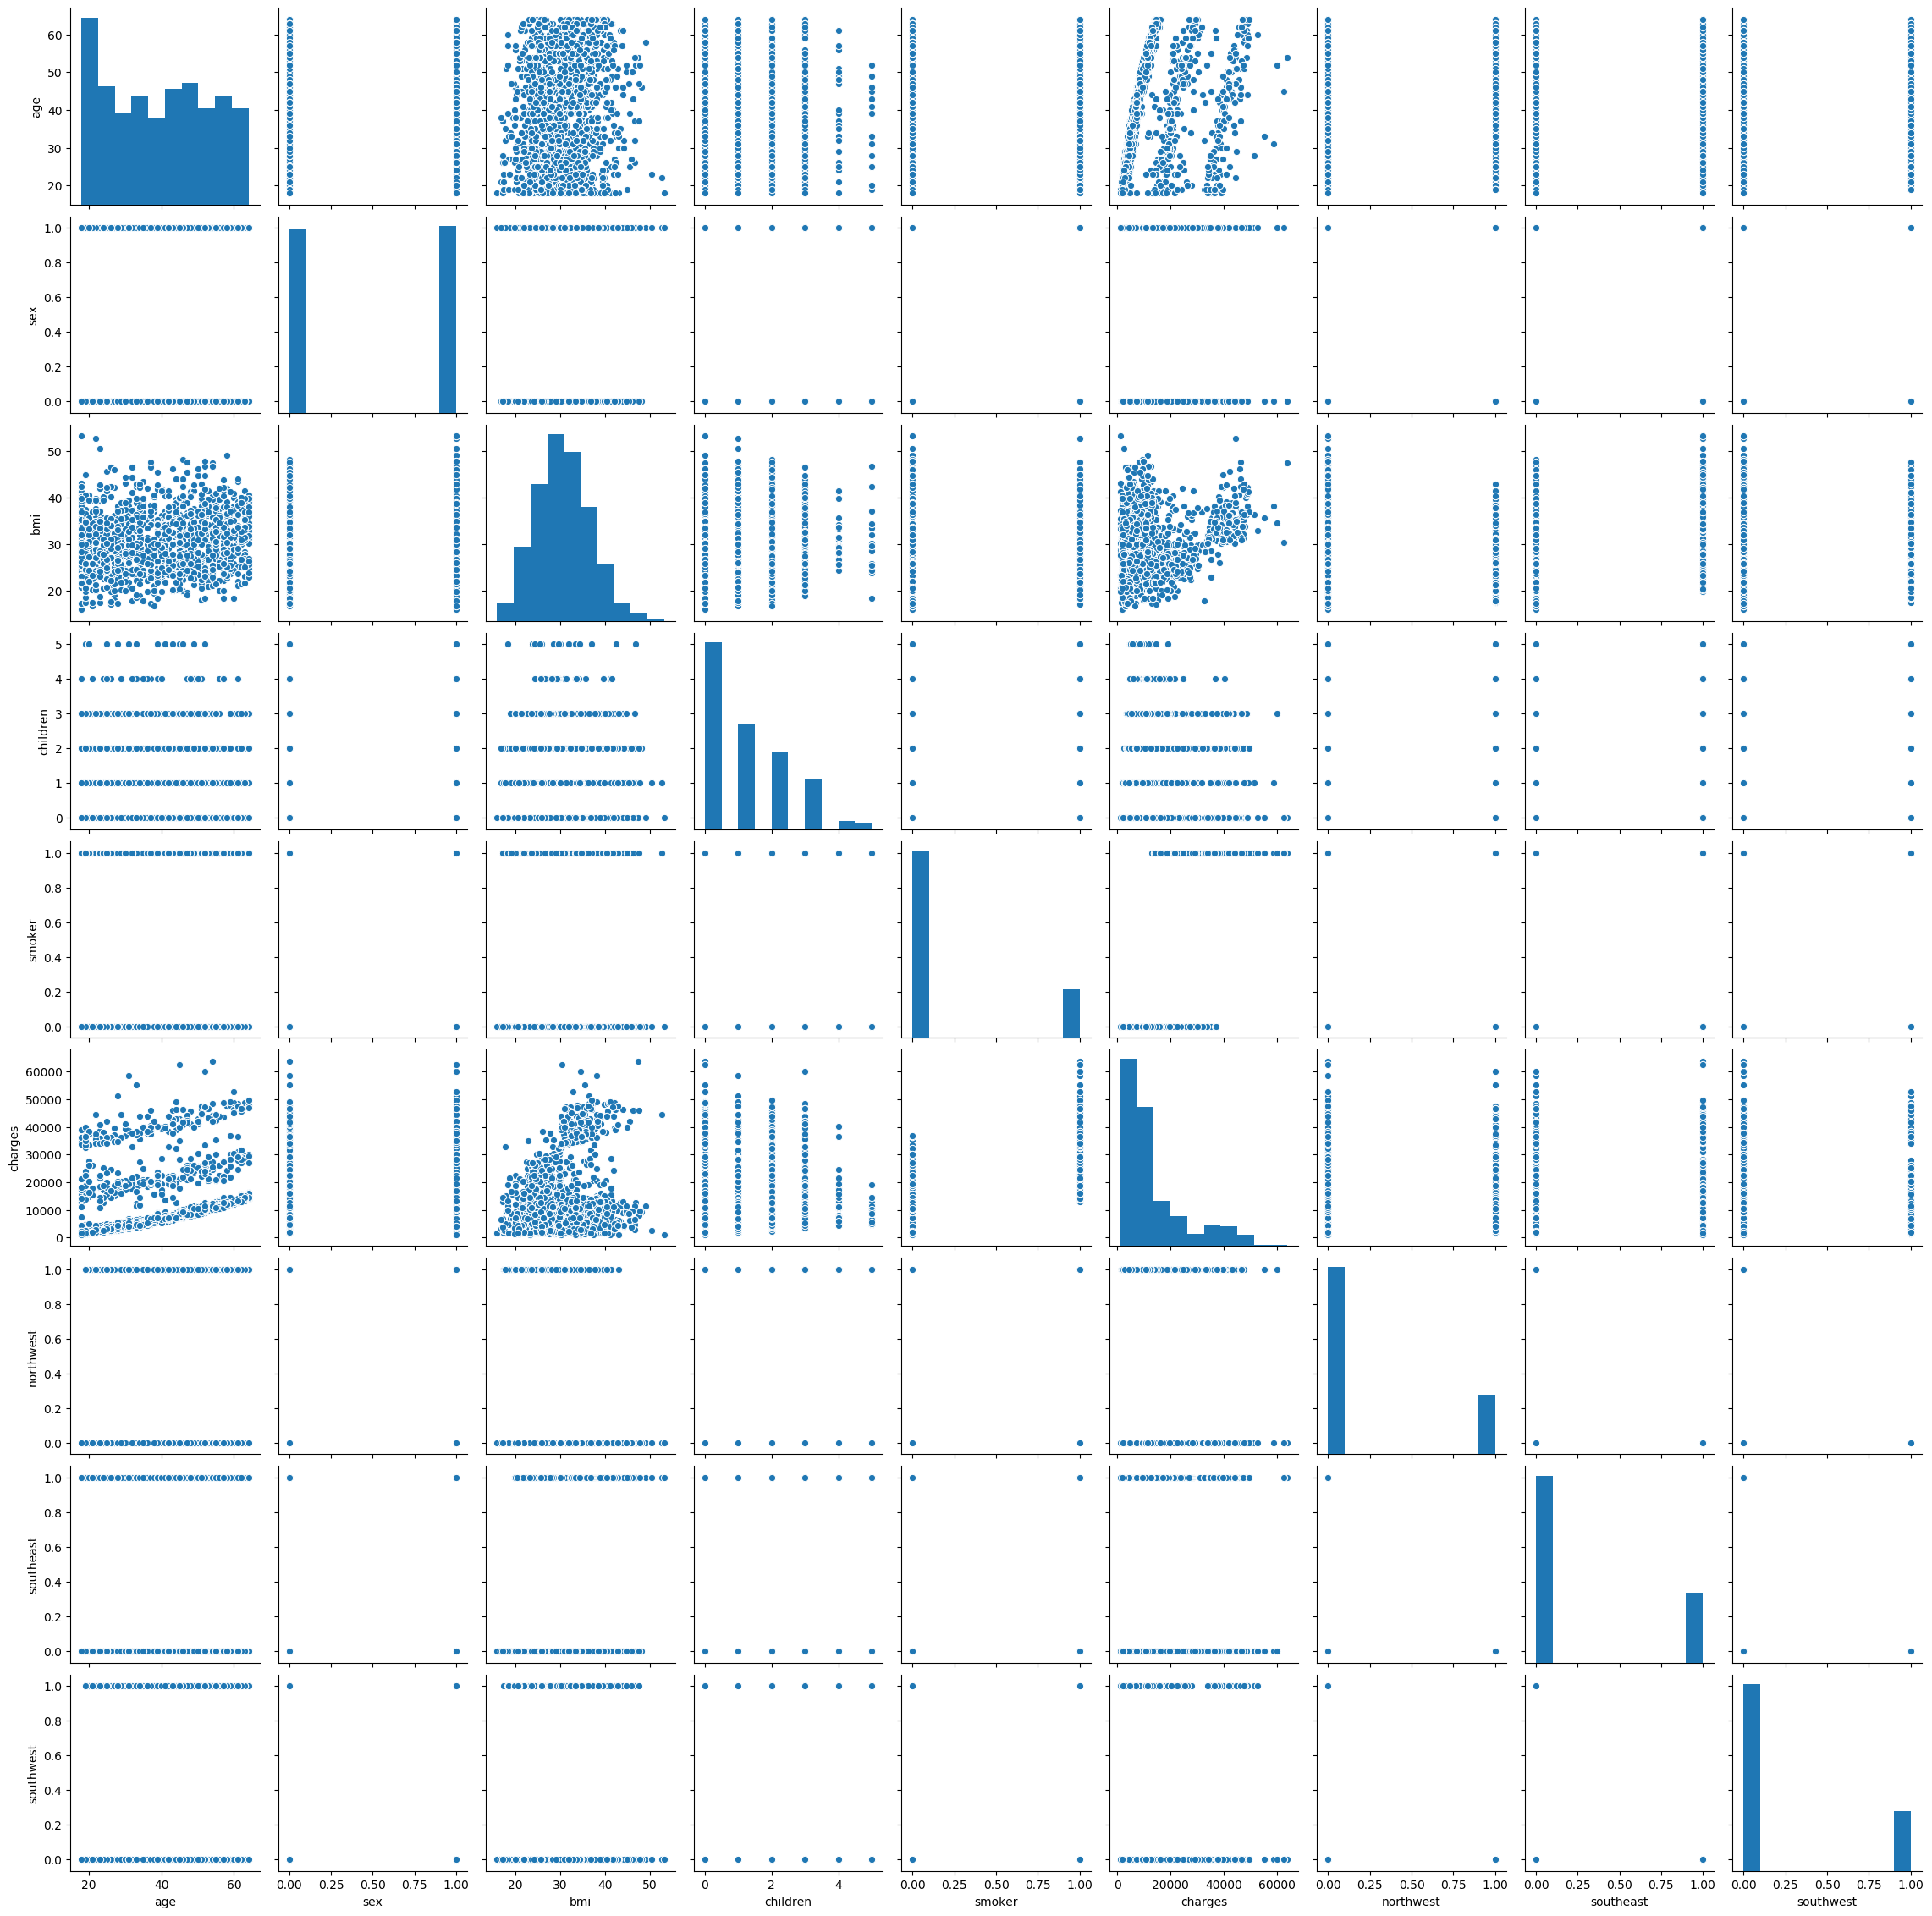

In [24]:
# plot pairplot

sns.pairplot(insurance_df)

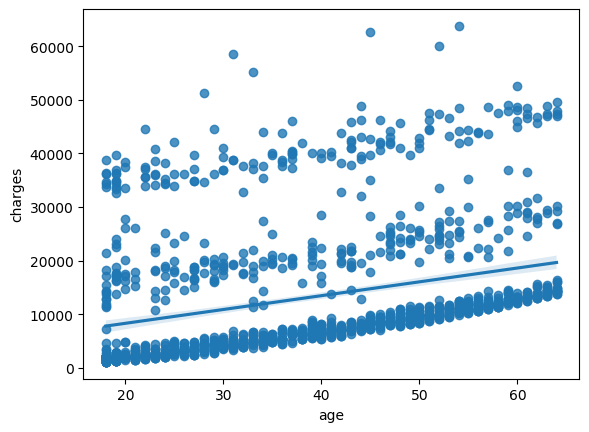

In [25]:
# regression plot of age and charges
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

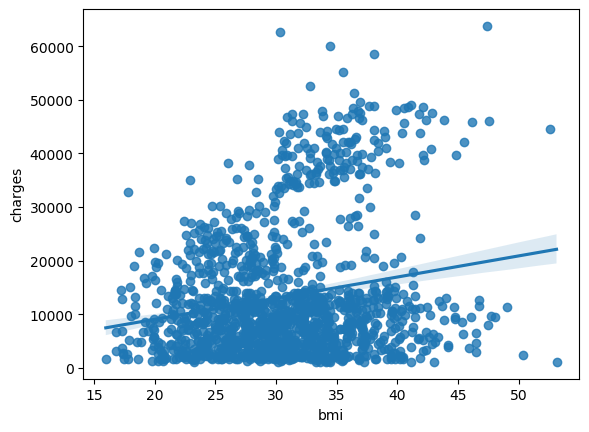

In [67]:
# regression plot of bmi and charges
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

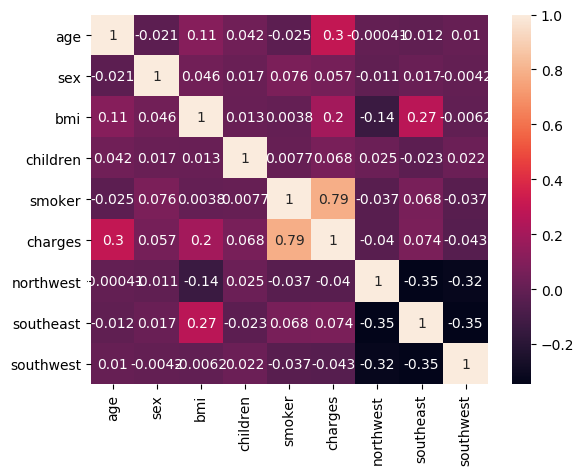

In [72]:
# correlation matrix of features
plt.Figure(figsize=(20,20))
sns.heatmap(insurance_df.corr(),annot=True)

**Observation:**
- Smoker and age have positive correlations with charges

# Building and Validating Predictive Models <a id='s3'></a>

In [34]:
# look at columns of df
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [35]:
# splitting df into feature matrix and target vector
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']


In [36]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [37]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [38]:
# shape of X
X.shape

(1338, 8)

In [39]:
# shape of y
y.shape

(1338,)

In [40]:
# converting into dtype specific for SageMaker algorithm
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [41]:
# make y 2D
y = y.reshape(-1,1)

In [42]:
# only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [44]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


In [38]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7835929775784993

In [40]:
# predictions from model
y_predict = regresssion_model_sklearn.predict(X_test)

In [41]:
# reverse scaling to see original values
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [42]:
# number of samples
k = X_test.shape[1]
n = len(X_test)
n

268

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)


In [75]:
MAE = float(mean_absolute_error(y_test_orig, y_predict_orig))
r2=r2_score(y_test_orig, y_predict_orig)
adj_r2=1-(1- r2 )* (n-1) /(n-k-1)

In [76]:
print(MAE,r2,adj_r2)

4181.1943359375 0.783592988481633 0.7769086020254672


# LINEAR LEARNER MODEL USING SAGEMAKER

In [47]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = 'insurance-pred-eft'
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# let's get the execution role for the notebook instance. 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::787144017525:role/service-role/AmazonSageMaker-ExecutionRole-20230722T094075


In [45]:
X_train.shape

(1070, 8)

In [46]:
y_train.shape

(1070, 1)

In [47]:
# y_train = y_train[:,0]

In [48]:
y_train.shape

(1070, 1)

In [52]:
# the io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import io 
# sagemaker common libary
import sagemaker.amazon.common as smac 


# code below converts the data in numpy array format to RecordIO format
# this is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() 
smac.write_numpy_to_dense_tensor(buf, X_train, y_train.reshape(-1))
buf.seek(0) 


0

In [53]:
import os

# code to upload RecordIO data to S3
 
# key refers to the name of the file    
key = 'linear-train-data'

# the following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://insurance-pred-eft/linear_learner/train/linear-train-data


In [54]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://insurance-pred-eft/linear_learner/output


In [55]:
# this code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# let's obtain a reference to the linearLearner container image
# note that all regression models are named estimators
# you don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [56]:
# we have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# we can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# we can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 32,
                           loss = 'absolute_loss')

# fitting Linear Learner algortihm
linear.fit({'train': s3_train_data})



train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2023-07-30-13-27-44-317


2023-07-30 13:27:44 Starting - Starting the training job...
2023-07-30 13:28:00 Starting - Preparing the instances for training......
2023-07-30 13:29:06 Downloading - Downloading input data...
2023-07-30 13:29:31 Training - Downloading the training image.........
2023-07-30 13:30:51 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/30/2023 13:30:59 INFO 140209628247872] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss':

# DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [60]:
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html


linear_regressor = linear.deploy(initial_instance_count = 1,
                                 instance_type = 'ml.m4.xlarge',
                                 serializer=CSVSerializer(),
                                 deserializer=JSONDeserializer())

INFO:sagemaker:Creating model with name: linear-learner-2023-07-30-13-35-24-628
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-07-30-13-35-24-628
INFO:sagemaker:Creating endpoint with name linear-learner-2023-07-30-13-35-24-628


--------!

In [77]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [78]:
# results are in Json format
result 

{'predictions': [{'score': -0.39474672079086304},
  {'score': -0.6545198559761047},
  {'score': 2.3229305744171143},
  {'score': -0.42945194244384766},
  {'score': 1.3633484840393066},
  {'score': -0.5180150866508484},
  {'score': -1.112980604171753},
  {'score': 0.036420710384845734},
  {'score': -0.9007826447486877},
  {'score': -0.3309958577156067},
  {'score': 1.6265028715133667},
  {'score': -0.5096449851989746},
  {'score': -0.7669838666915894},
  {'score': 2.166320562362671},
  {'score': 2.3962628841400146},
  {'score': 2.1298468112945557},
  {'score': -0.15974552929401398},
  {'score': 2.098792791366577},
  {'score': -0.40648210048675537},
  {'score': 1.8570019006729126},
  {'score': -0.8365526795387268},
  {'score': -0.40815240144729614},
  {'score': -1.0079283714294434},
  {'score': -0.790063738822937},
  {'score': -0.2992885112762451},
  {'score': -0.15724226832389832},
  {'score': -0.0316629484295845},
  {'score': -0.7848984599113464},
  {'score': -0.33493953943252563},
  {

In [79]:
# since the result is in json format, I access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [80]:
predictions

array([-3.94746721e-01, -6.54519856e-01,  2.32293057e+00, -4.29451942e-01,
        1.36334848e+00, -5.18015087e-01, -1.11298060e+00,  3.64207104e-02,
       -9.00782645e-01, -3.30995858e-01,  1.62650287e+00, -5.09644985e-01,
       -7.66983867e-01,  2.16632056e+00,  2.39626288e+00,  2.12984681e+00,
       -1.59745529e-01,  2.09879279e+00, -4.06482100e-01,  1.85700190e+00,
       -8.36552680e-01, -4.08152401e-01, -1.00792837e+00, -7.90063739e-01,
       -2.99288511e-01, -1.57242268e-01, -3.16629484e-02, -7.84898460e-01,
       -3.34939539e-01, -1.04250848e+00, -4.51299965e-01, -1.69042781e-01,
       -9.09027100e-01, -8.31512511e-01, -8.35220993e-01, -2.95454443e-01,
       -9.69451606e-01, -4.43430245e-01,  2.04857850e+00,  1.82355428e+00,
       -9.03079867e-01, -9.44698393e-01, -9.11002606e-02, -2.09296182e-01,
       -6.05485380e-01, -1.30122930e-01, -9.04769361e-01, -8.59986901e-01,
        2.03066278e+00, -6.21267796e-01,  3.83172259e-02, -1.02911782e+00,
       -4.20577645e-01, -

In [81]:
predictions.shape

(268,)

In [82]:
# reversing the transformation
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)

In [83]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6166.98 
MSE = 38031640.86666906 
MAE = 3418.82080646875 
R2 = 0.7550276878607206 
Adjusted R2 = 0.7474609755166501


In [84]:
# delete the end-point

linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2023-07-30-13-35-24-628
INFO:sagemaker:Deleting endpoint with name: linear-learner-2023-07-30-13-35-24-628


# ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [11]:
pip install --upgrade pip

  Using cached pip-23.2.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow

You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.


In [4]:
# libraries for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [6]:
# optimizer = Adam()
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                450       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_6 (Activation)    (None, 150)              

In [49]:
# fit ANN model
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
Extension horovod.torch has not been built: /usr/local/lib/python3.8/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-38-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2023-07-30 15:13:17.652 tensorflow-2-6-gpu-py-ml-t3-medium-2e2c7c0afde0c32682030cb02477:31 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-07-30 15:13:17.747 tensorflow-2-6-gpu-py-ml-t3-medium-2e2c7c0afde0c32682030cb02477:31 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
43/43 [==============================] - 1s 6ms/step - loss: 0.7265 - val_loss: 0.2946
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4169 - val_loss: 0.2100
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3205 - val_loss: 0.1738
Epoch 4/100
4

In [50]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 3ms/step - loss: 0.1813
Accuracy : 0.8186896443367004


In [51]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

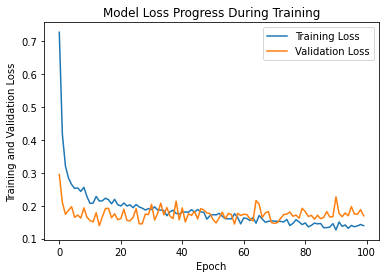

In [52]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

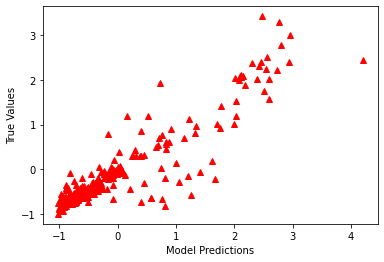

In [53]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [54]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

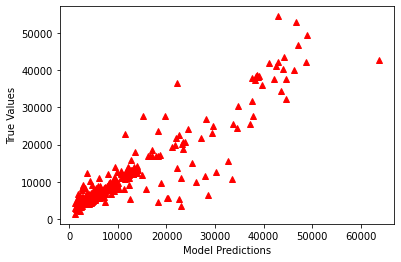

In [55]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [56]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5115.582 
MSE = 26169176.0 
MAE = 2986.2544 
R2 = 0.8314370960526327 
Adjusted R2 = 0.8262305198689303


# Conclusion <a id='s4'></a>

In this Health Insurance Cost Prediction project, I applied two different predictive models, SageMaker Linear Learner and Artificial Neural Networks (ANN), to estimate the health insurance cost incurred by individuals based on various factors. Here are the key findings from our model evaluations:

## SageMaker Linear Learner Model Scores:
- Mean Squared Error (MSE): 0.2992234559816735
- Absolute Loss: 0.30221866892877025
- Root Mean Squared Error (RMSE): 0.5470132137176154
- R-squared (R2): 0.7007765460174951
- Mean Absolute Error (MAE): 0.30221866

The SageMaker Linear Learner model demonstrates respectable performance, with a moderate R-squared value of 0.70, indicating that it explains approximately 70% of the variance in health insurance costs. The low values of MSE, RMSE, and MAE further validate the model's ability to make accurate predictions.

## Artificial Neural Networks (ANN) Model Scores:
- Root Mean Squared Error (RMSE): 5115.582
- Mean Squared Error (MSE): 26169176.0
- Mean Absolute Error (MAE): 2986.2544
- R-squared (R2): 0.8314370960526327
- Adjusted R-squared: 0.8262305198689303

The ANN model exhibits superior performance compared to the Linear Learner, with a higher R-squared value of 0.83, indicating that it explains approximately 83% of the variance in health insurance costs. The low values of RMSE, MSE, and MAE underscore the model's ability to make accurate predictions.

Overall, both models showcase their strengths in predicting health insurance costs, with the ANN model outperforming the Linear Learner model in terms of predictive accuracy. The ANN model's ability to capture complex relationships within the data contributes to its improved performance.

To optimize the ANN model, I trained it for 100 epochs, allowing it to learn from the data over multiple iterations and achieve the best possible performance.

As I conclude this project, I recognize the significance of leveraging advanced machine learning techniques like SageMaker Linear Learner and ANN in the realm of healthcare expenses. These predictive models provide invaluable insights to individuals, healthcare providers, and insurance companies, enabling them to make informed decisions regarding healthcare plans, coverage, and budgeting.

The successful implementation of these models can potentially revolutionize healthcare resource allocation and decision-making, fostering a more efficient and informed healthcare system. It is essential to continue refining and fine-tuning these models with additional data to further enhance their predictive capabilities and contribute to better healthcare outcomes.
